In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
import os

In [2]:
ica_data = load_json_model(os.path.join('..','example_data','processed_data','bsu.json.gz'))

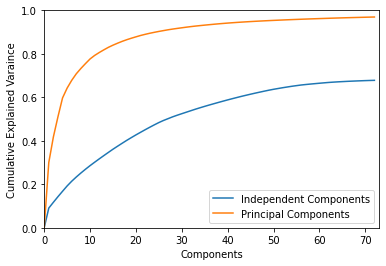

In [3]:
plot_explained_variance(ica_data)

## Inspect all iModulons without an automated annotation

In [17]:
other_imods = ica_data.imodulon_table[ica_data.imodulon_table.regulator.isnull() & ica_data.imodulon_table.single_gene.isnull()]

In [18]:
other_imods

,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs,single_gene
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### iModulon 1: Putative technical artifact

In [49]:
ica_data.view_imodulon(1)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_00160,0.123163,sleL,AL009126.3,BSU00160,23868,25151,-,spore peptidoglycan N-acetylglucosaminidase,Cell wall/membrane/envelope biogenesis,P37531,Op9
BSU_01960,0.118793,skfF,AL009126.3,BSU01960,217697,219040,+,sporulation killing factor biosynthesis and ex...,Function unknown,O31428,Op145
BSU_02070,0.118850,csgA,AL009126.3,BSU02070,228066,228314,+,sporulation-specific SASP protein,Function unknown,P54379,Op154
BSU_02220,0.062502,ybfI,AL009126.3,BSU02220,242834,243661,-,putative transcriptional regulator (AraC/XylS ...,Transcription,O31449,Op168
BSU_02660,0.063209,ycbU,AL009126.3,BSU02660,287499,288611,+,putative lyase (PLP-dependent),Amino acid transport and metabolism,P42253,Op201
...,...,...,...,...,...,...,...,...,...,...,...
BSU_39060,0.042611,citH,AL009126.3,BSU39060,4010404,4011684,+,secondary transporter of divalent metal ions/c...,Energy production and conversion,P42308,Op3019
BSU_39200,0.060623,yxzC,AL009126.3,BSU39200,4021896,4022264,-,putative nucleic acid binding protein,No COG annotation,O32286,Op3032
BSU_39330,0.059463,abnB,AL009126.3,BSU39330,4039466,4040875,-,arabinan endo-1%2C5-alpha-L-arabinosidase ([Ca...,Carbohydrate transport and metabolism,P42293,Op3040
BSU_39500,0.043344,yxeM,AL009126.3,BSU39500,4059488,4060282,-,putative ABC transporter (binding lipoprotein),Cell wall/membrane/envelope biogenesis,P54952,Op3045


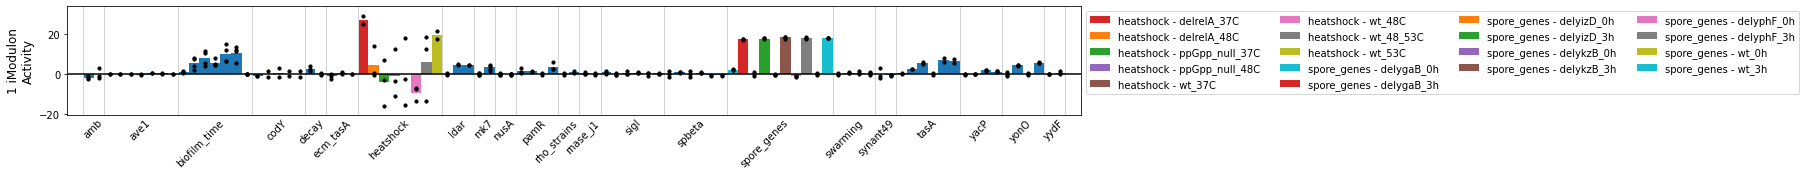

In [25]:
plot_activities(ica_data,1,highlight=['heatshock','spore_genes'])

### iModulon 3: Putative technical artifact

In [45]:
ica_data.view_imodulon(3)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_00220,0.074081,yaaL,AL009126.3,BSU00220,29481,29705,+,conserved protein of unknown function,Function unknown,P37533,Op15
BSU_01790,0.146841,ybbU,AL009126.3,BSU01790,202126,202266,+,hypothetical protein,No COG annotation,A0A2K4Z9G0,Op134
BSU_01920,0.038189,skfB,AL009126.3,BSU01920,214175,215407,+,synthesis of sporulation killing factor A,"Translation, ribosomal structure and biogenesis",O31423,Op145
BSU_02000,-0.045146,ybdJ,AL009126.3,BSU02000,221258,221929,+,two-component system response regulator [YbdK],Signal transduction mechanisms,O31432,Op147
BSU_02220,-0.052457,ybfI,AL009126.3,BSU02220,242834,243661,-,putative transcriptional regulator (AraC/XylS ...,Transcription,O31449,Op168
...,...,...,...,...,...,...,...,...,...,...,...
BSU_40160,-0.107328,liaK,AL009126.3,BSU40160,4125742,4126500,-,membrane metalloprotease acting on modified fa...,"Post-translational modification, protein turno...",Q45594,Op3080
BSU_40460,0.113660,yyzB,AL009126.3,BSU40460,4159253,4159456,-,conserved protein of unknown function,No COG annotation,O32296,Op3102
BSU_40574,0.072859,yyzJ,AL009126.3,NaN,4171625,4171789,-,hypothetical protein,Function unknown,NaN,Op3113
BSU_40610,0.041476,yybK,AL009126.3,BSU40610,4175117,4175872,+,putative transporter permease subunit,Function unknown,P37493,Op3117


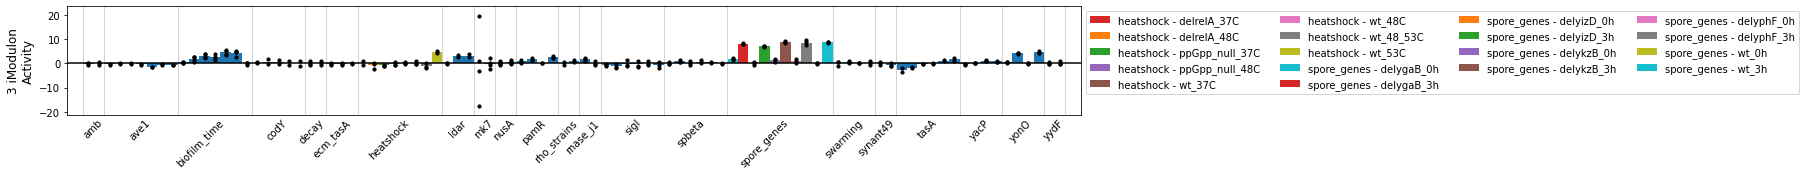

In [27]:
plot_activities(ica_data,3,highlight=['heatshock','spore_genes'])

### iModulon 6: Unknown prophage 1 operon

In [44]:
ica_data.view_imodulon(6)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_01830,0.272368,ndhF,AL009126.3,BSU01830,205409,206926,+,putative NADH dehydrogenase%3B prophage 1 region,Energy production and conversion,P39755,Op137
BSU_01845,0.265787,ybcC,AL009126.3,BSU01845,206941,209556,+,conserved transmembrane protein coupled to NAD...,Function unknown,O34688,Op138
BSU_01860,0.254484,ybcF,AL009126.3,BSU01860,209633,210160,+,putative enzyme%3B prophage 1 region,Inorganic ion transport and metabolism,O34823,Op139
BSU_01870,0.260051,ybcH,AL009126.3,BSU01870,210224,210514,+,conserved protein of unknown function%3B proph...,No COG annotation,O34795,Op140
BSU_01880,0.199487,ybcI,AL009126.3,BSU01880,210572,210946,+,conserved hypothetical protein%3B prophage 1 r...,Function unknown,O34380,Op141


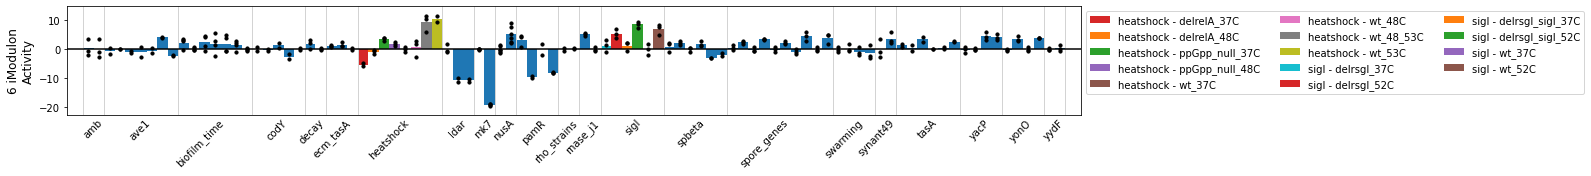

In [32]:
plot_activities(ica_data,6,highlight=['heatshock','sigI'])

### iModulon 7: Putative yvaF

In [50]:
ica_data.view_imodulon(7)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_33540,0.125035,azoRB,AL009126.3,BSU33540,3445442,3446077,-,NADH:dichloroindophenol oxidoreductase (2-meth...,Lipid transport and metabolism,O32224,Op2636
BSU_33550,0.230015,yvaC,AL009126.3,BSU33550,3446237,3448132,-,putative integral inner membrane protein,Function unknown,O32225,Op2637
BSU_33560,0.349249,yvaD,AL009126.3,BSU33560,3448295,3448696,-,putative integral inner membrane protein,Function unknown,O32226,Op2638
BSU_33570,0.357373,yvaE,AL009126.3,BSU33570,3448693,3449052,-,putative metabolite-efflux transporter,Inorganic ion transport and metabolism,O32227,Op2639
BSU_33580,0.343573,yvaF,AL009126.3,BSU33580,3449049,3449621,-,putative transcriptional regulator,Transcription,O32228,Op2640


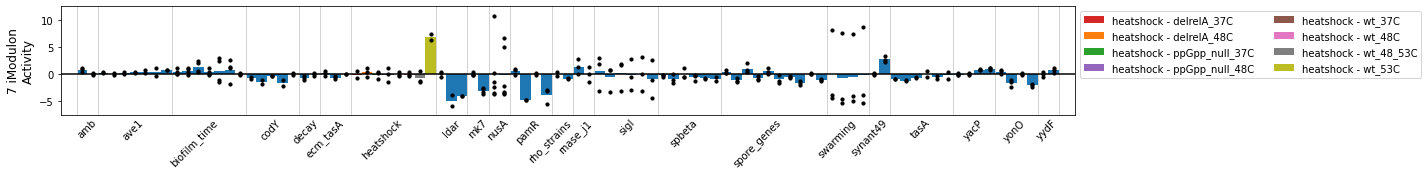

In [35]:
plot_activities(ica_data,7,highlight=['heatshock'])

### iModulon 9

In [51]:
ica_data.view_imodulon(9)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_00240,-0.041348,csfB,AL009126.3,BSU00240,35531,35725,+,forespore-specific anti-sigma factor,Function unknown,P37534,Op17
BSU_01620,0.045969,feuB,AL009126.3,BSU01620,181347,182351,-,ferri-bacillibactin permease,Inorganic ion transport and metabolism,P40410,Op121
BSU_01790,-0.099195,ybbU,AL009126.3,BSU01790,202126,202266,+,hypothetical protein,No COG annotation,A0A2K4Z9G0,Op134
BSU_02180,-0.086825,ybfEc,AL009126.3,NaN,238164,238448,-,conserved protein of unknown function (C-termi...,No COG annotation,NaN,Op163
BSU_02785,-0.033619,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212
...,...,...,...,...,...,...,...,...,...,...,...
BSU_40529,0.046294,yyzH,AL009126.3,BSU40529,4166815,4166964,-,hypothetical protein,No COG annotation,C0H3U2,Op3106
BSU_40578,0.105474,yyzK,AL009126.3,NaN,4172259,4172405,-,hypothetical protein,No COG annotation,NaN,Op3115
BSU_40579,0.121683,yyzL,AL009126.3,NaN,4172387,4172536,-,hypothetical protein,No COG annotation,NaN,Op3116
BSU_40640,-0.039631,yybH,AL009126.3,BSU40640,4177756,4178145,-,conserved hypothetical protein,Function unknown,P37496,Op3118


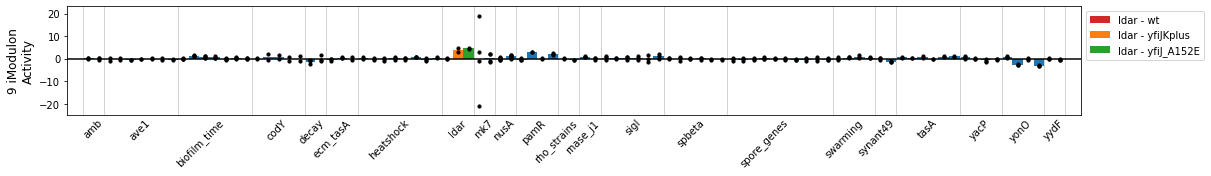

In [52]:
plot_activities(ica_data,9,highlight=['ldar'])

### iModulon 26: SP-beta

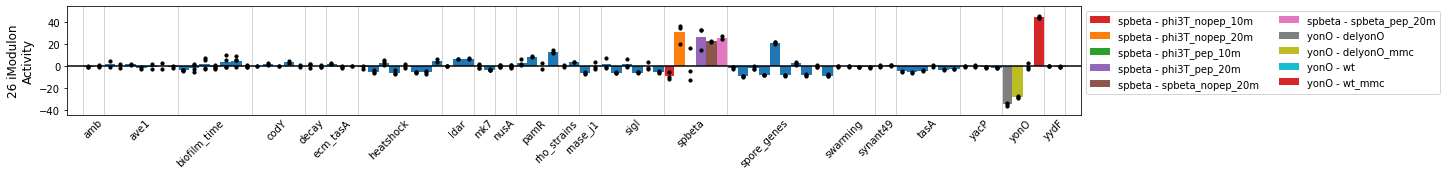

In [55]:
plot_activities(ica_data,26,highlight=['spbeta','yonO'])

### iModulon 51

In [57]:
ica_data.view_imodulon(51)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_04530,0.076764,fbpB,AL009126.3,BSU04530,506322,506501,-,regulator of iron homeostasis,Function unknown,P96609,Op338
BSU_04990,0.079265,yddJ,AL009126.3,BSU04990,545595,545975,+,ICEBs1 mobile element: putative lipoprotein of...,Function unknown,P96647,Op377
BSU_25565,0.071803,BSU_25565,AL009126.3,BSU25565,2637179,2637328,-,hypothetical protein,No COG annotation,A0A2K4Z9K3,Op2018
BSU_27600,0.155245,rsh,AL009126.3,BSU27600,2820529,2822733,-,GTP pyrophosphokinase (RelA/SpoT),Transcription,O54408,Op2206


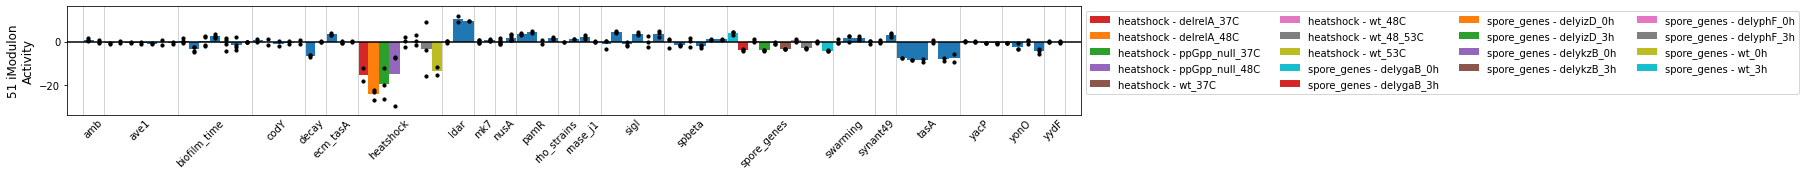

In [58]:
plot_activities(ica_data,51,highlight=['heatshock','spore_genes'])

### iModulon 52

In [59]:
ica_data.view_imodulon(52)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_18130,0.095418,eglS,AL009126.3,BSU18130,1940625,1942124,+,endo-1%2C4-beta-glucanase,Carbohydrate transport and metabolism,P10475,Op1382
BSU_18140,0.156711,ynfE,AL009126.3,BSU18140,1942192,1942455,+,conserved hypothetical protein,No COG annotation,Q45069,Op1383
BSU_18150,0.083893,xynC,AL009126.3,BSU18150,1942714,1943982,-,secreted endo-xylanase,Cell wall/membrane/envelope biogenesis,Q45070,Op1384
BSU_18160,0.082117,xynD,AL009126.3,BSU18160,1944113,1945654,-,arabinoxylan arabinofuranohydrolase,Carbohydrate transport and metabolism,Q45071,Op1385
BSU_18190,0.083229,yngC,AL009126.3,BSU18190,1947668,1948264,+,putative integral inner membrane protein%2C ph...,Function unknown,O31823,Op1388
BSU_18200,0.145381,nrnB,AL009126.3,BSU18200,1948313,1949512,-,oligoribonuclease (nanoRNase),Function unknown,O31824,Op1389
BSU_18210,0.208872,ldeE,AL009126.3,BSU18210,1949682,1951217,-,methylcrotonoyl-CoA carboxylase subunit (leuci...,Lipid transport and metabolism,O31825,Op1390
BSU_18220,0.227312,ldeF,AL009126.3,BSU18220,1951228,1952010,-,methylglutaconyl-CoA hydratase (leucine degrad...,Lipid transport and metabolism,O34893,Op1390
BSU_18230,0.223275,ldeG,AL009126.3,BSU18230,1952031,1952930,-,hydroxymethylglutaryl-CoA lyase (leucine degra...,Amino acid transport and metabolism,O34873,Op1390
BSU_18239,0.237199,lgeHB,AL009126.3,BSU18239,1952945,1953166,-,methylcrotonyl-CoA carboxylase%3B biotinylated...,Lipid transport and metabolism,C0H419,Op1390


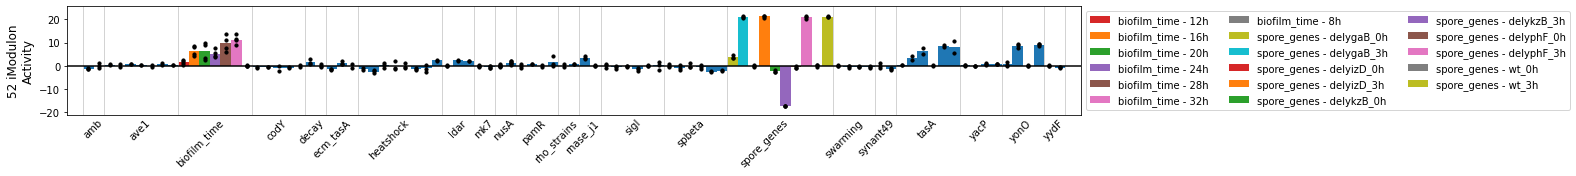

In [61]:
plot_activities(ica_data,52,highlight=['biofilm_time','spore_genes'])

### iModulon 60: SP-beta-2

In [97]:
from pymodulon.util import explained_variance

In [62]:
ica_data.view_imodulon(60)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_17715,0.078924,BSU_17715,AL009126.3,BSU17715,1905637,1905774,+,hypothetical protein,No COG annotation,A0A2K4Z9J1,Op1347
BSU_18909,0.240805,yozZ,AL009126.3,NaN,2061855,2061995,+,putative phage holin (fragment),Function unknown,NaN,Op1461
BSU_21040,-0.174475,yonO,AL009126.3,BSU21040,2222574,2225093,+,conserved protein of unknown function%3B phage...,No COG annotation,O31945,Op1674
BSU_21360,-0.193037,yomH,AL009126.3,BSU21360,2256062,2256820,+,conserved protein of unknown function%3B phage...,Function unknown,O31977,Op1709
BSU_21370,-0.175129,yomG,AL009126.3,BSU21370,2256832,2259459,+,putative DNA wielding protein%3B SPbeta phage,Function unknown,O31978,Op1710
BSU_21400,0.075001,yomD,AL009126.3,BSU21400,2262437,2263261,+,conserved protein of unknown function%3B phage...,No COG annotation,O31981,Op1713
BSU_21420,-0.208069,bhlA,AL009126.3,BSU21420,2264680,2264892,+,holin-like protein%3B bacteriophage SPbeta,Function unknown,O31983,Op1716
BSU_21430,-0.199901,bhlB,AL009126.3,BSU21430,2264903,2265169,+,holin-like protein%3B bacteriophage SPbeta,Function unknown,O31984,Op1717
BSU_25875,-0.077173,BSU_25875,AL009126.3,BSU25875,2663408,2663554,+,hypothetical protein,No COG annotation,A0A2K4Z9K0,Op2044
BSU_25930,-0.082893,yqcE,AL009126.3,BSU25930,2666884,2667048,-,conserved phage protein of unknown function%3B...,No COG annotation,P45940,Op2049


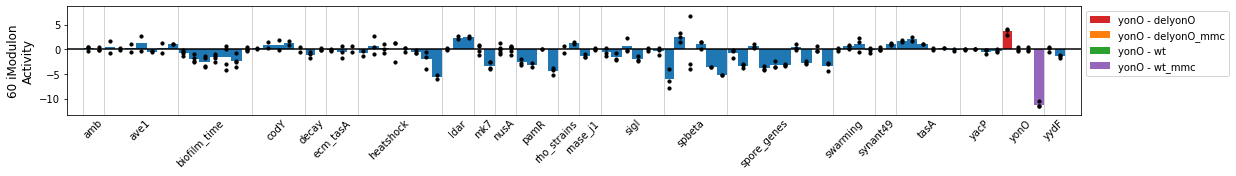

In [64]:
plot_activities(ica_data,60,highlight=['spBeta','yonO'])

### iModulon 61: biofilm

In [96]:
ica_data.view_imodulon(61)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_03359,0.070463,yczL,AL009126.3,BSU03359,365850,366035,+,hypothetical protein,No COG annotation,C0H3U7,Op251
BSU_07560,0.060866,pelA,AL009126.3,BSU07560,827993,829255,+,pectate lyase,Carbohydrate transport and metabolism,P39116,Op602
BSU_08230,0.084936,catD,AL009126.3,BSU08230,897588,897992,+,catechol-2%2C3-dioxygenase membrane subunit,Function unknown,P54720,Op640
BSU_08240,0.082969,catE,AL009126.3,BSU08240,898010,898867,+,catechol-2%2C3-dioxygenase subunit,Function unknown,P54721,Op640
BSU_10300,0.060752,aprE,AL009126.3,BSU10300,1104423,1105568,-,serine alkaline protease (Ca(2+)-dependent sub...,"Post-translational modification, protein turno...",P04189,Op807
BSU_11040,0.109451,yitM,AL009126.3,BSU11040,1182448,1183032,-,conserved hypothetical protein,No COG annotation,O06748,Op864
BSU_11055,0.074836,yitO,AL009126.3,BSU11055,1183029,1183958,-,putative integral inner membrane protein with ...,No COG annotation,O06750,Op864
BSU_11070,0.066387,yitP,AL009126.3,BSU11070,1183943,1184479,-,conserved hypothetical protein,Function unknown,O06751,Op864
BSU_12200,0.081363,yjiA,AL009126.3,BSU12200,1290675,1290953,-,hypothetical protein,No COG annotation,O34679,Op955
BSU_13190,0.081301,ispA,AL009126.3,BSU13190,1386024,1386983,-,intracellular serine protease,"Post-translational modification, protein turno...",P11018,Op1028


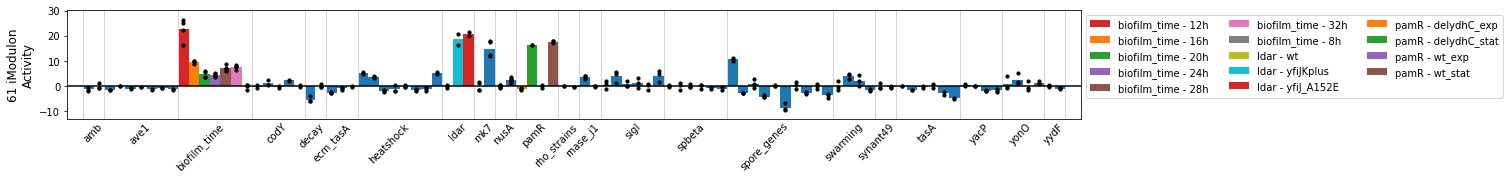

In [86]:
plot_activities(ica_data,61,highlight=['biofilm_time','ldar','pamR'])

### iModulon 68

In [69]:
ica_data.view_imodulon(68)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_00440,0.091876,veg,AL009126.3,BSU00440,52763,53023,+,conserved hypothetical protein,Function unknown,P37466,Op35
BSU_00450,0.056840,sspF,AL009126.3,BSU00450,53183,53368,+,small acid-soluble spore protein (alpha/beta-t...,Function unknown,P37549,Op36
BSU_01889,0.053660,ybzH,AL009126.3,BSU01889,211429,211731,+,putative transcriptional regulator (ArsR famil...,Transcription,C0H3S9,Op142
BSU_02785,0.048965,BSU_02785,AL009126.3,BSU02785,300525,300656,-,hypothetical protein,No COG annotation,A0A2K4Z9F5,Op212
BSU_03780,0.111154,phrC,AL009126.3,BSU03780,429963,430085,+,secreted regulator of the activity of phosphat...,No COG annotation,P94416,Op284
BSU_05120,0.060560,cspC,AL009126.3,BSU05120,559264,559464,+,cold-shock protein,Transcription,P39158,Op391
BSU_06269,0.078490,ydzJ,AL009126.3,BSU06269,680907,681065,-,hypothetical protein,No COG annotation,O24817,Op503
BSU_09630,0.116020,yhdX,AL009126.3,BSU09630,1038653,1038760,+,conserved hypothetical protein,No COG annotation,O07593,Op745
BSU_09700,0.188637,bmrB,AL009126.3,BSU09700,1045037,1045198,+,regulator leader peptide,No COG annotation,O07551,Op752
BSU_10230,0.058568,yhfH,AL009126.3,BSU10230,1098120,1098260,-,conserved protein of unknown function,Function unknown,O07606,Op800


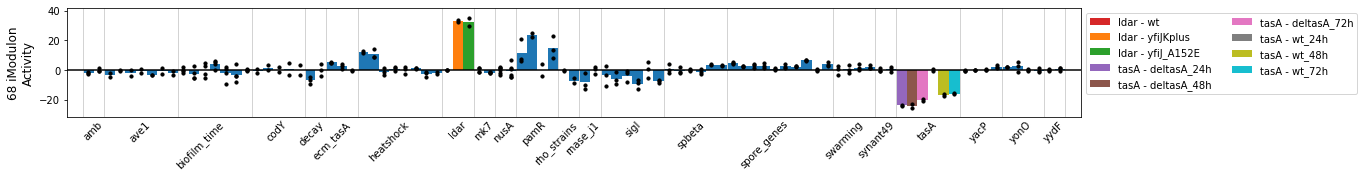

In [89]:
plot_activities(ica_data,68,highlight=['ldar','tasA'])

### iModulon 69

In [72]:
ica_data.view_imodulon(69)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_07770,0.089101,yfkS,AL009126.3,BSU07770,847282,847482,-,putative spore germination D protein,No COG annotation,O35036,Op616
BSU_07780,0.113342,yfkR,AL009126.3,BSU07780,847498,848652,-,putative spore germination protein,Function unknown,O35028,Op616
BSU_18978,0.089788,bsrE,AL009126.3,BSU18978,2069883,2069975,+,type I toxin (BsrE/AsrE),No COG annotation,A0A2K4Z9J5,Op1467
BSU_33010,0.184001,cssR,AL009126.3,BSU33010,3385724,3386401,+,folding stress-sensitive two-component respons...,Signal transduction mechanisms,O32192,Op2595
BSU_33020,0.230461,cssS,AL009126.3,BSU33020,3386398,3387753,+,folding stress-sensitive two-component sensor ...,Signal transduction mechanisms,O32193,Op2595
BSU_35810,0.098531,gerBB,AL009126.3,BSU35810,3690269,3691375,+,component of germinant receptor B,Amino acid transport and metabolism,P39570,Op2788
BSU_35820,0.099053,gerBC,AL009126.3,BSU35820,3691372,3692496,+,lipoprotein component of the germination recep...,Function unknown,P39571,Op2788


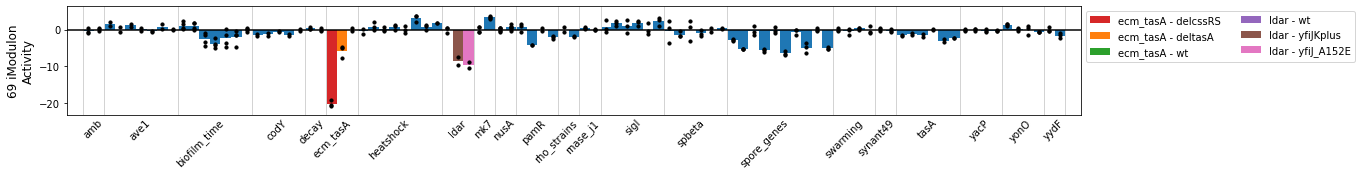

In [74]:
plot_activities(ica_data,69,highlight=['ecm_tasA','ldar'])

### iModulon 70

In [75]:
ica_data.view_imodulon(70)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_01000,-0.062140,secE,AL009126.3,BSU01000,117532,117711,+,preprotein translocase subunit,"Intracellular trafficking, secretion, and vesi...",Q06799,Op62
BSU_02080,-0.053151,ybxH,AL009126.3,BSU02080,228331,228522,+,conserved protein of unknown function,Function unknown,P54426,Op154
BSU_02585,0.065121,BSU_02585,AL009126.3,BSU02585,281675,281809,-,hypothetical protein,No COG annotation,A0A2K4Z9H7,Op192
BSU_03788,-0.058862,yczM,AL009126.3,BSU03788,430185,430274,-,putative type I toxin,No COG annotation,C0H3V0,Op285
BSU_03789,0.063835,yczN,AL009126.3,BSU03789,430356,430469,-,putative spore and germination protein,No COG annotation,C0H3V1,Op286
...,...,...,...,...,...,...,...,...,...,...,...
BSU_39139,0.081856,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025
BSU_40120,-0.061538,ptsJ,AL009126.3,BSU40120,4122619,4122849,-,glucose phosphotransferase system enzyme IIA c...,Carbohydrate transport and metabolism,O32292,Op3077
BSU_40160,0.059322,liaK,AL009126.3,BSU40160,4125742,4126500,-,membrane metalloprotease acting on modified fa...,"Post-translational modification, protein turno...",Q45594,Op3080
BSU_40310,-0.066793,phrG,AL009126.3,BSU40310,4141358,4141474,+,secreted regulator of the activity of phosphat...,No COG annotation,O32295,Op3092


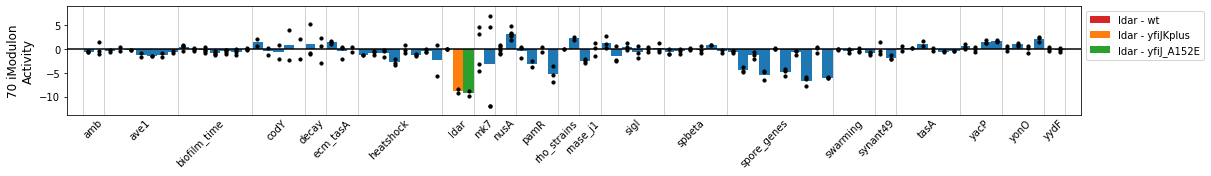

In [79]:
plot_activities(ica_data,70,highlight=['ldar'])

### iModulon 71

In [81]:
ica_data.view_imodulon(71)

,gene_weight,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
BSU_39120,0.107038,yxiM,AL009126.3,BSU39120,4017508,4018656,-,esterase (lipoprotein),Amino acid transport and metabolism,P42304,Op3023
BSU_39129,0.111279,yxzI,AL009126.3,NaN,4018786,4018974,-,hypothetical protein,No COG annotation,NaN,Op3024
BSU_39139,0.113504,yxzJ,AL009126.3,BSU39139,4019005,4019136,-,conserved protein of unknown function,No COG annotation,C0H3T5,Op3025
BSU_39140,0.116876,yxiK,AL009126.3,BSU39140,4019148,4019609,-,conserved protein of unknown function,No COG annotation,P42302,Op3026
BSU_39150,0.115552,yxiJ,AL009126.3,BSU39150,4019625,4019921,-,conserved protein of unknown function,Function unknown,P42320,Op3027
BSU_39160,0.127599,yxiI,AL009126.3,BSU39160,4019949,4020437,-,conserved protein of unknown function,Function unknown,P42301,Op3028
BSU_39170,0.133228,yxzG,AL009126.3,BSU39170,4020455,4020907,-,putative nucleic acid binding protein,No COG annotation,O32285,Op3029
BSU_39180,0.130903,yxiH,AL009126.3,BSU39180,4020977,4021306,-,conserved protein of unknown function,No COG annotation,P42300,Op3030
BSU_39190,0.141250,yxiG,AL009126.3,BSU39190,4021429,4021845,-,conserved hypothetical protein,No COG annotation,P42299,Op3031
BSU_39200,0.130152,yxzC,AL009126.3,BSU39200,4021896,4022264,-,putative nucleic acid binding protein,No COG annotation,O32286,Op3032


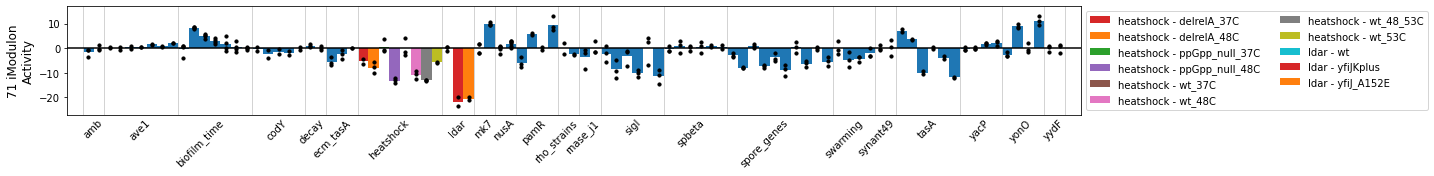

In [83]:
plot_activities(ica_data,71,highlight=['ldar','heatshock'])